In [20]:
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use("dark_background")

%matplotlib inline

statevector_simulator = q.Aer.get_backend("statevector_simulator")
qasm_simulator = q.Aer.get_backend("qasm_simulator")

def do_job(circuit):
    result = q.execute(circuit, backend=statevector_simulator).result()
    statevec = result.get_statevector()
    
    n_qubits = circuit.n_qubits
    
    circuit.measure([i for i in range(n_qubits)], [i for i in range(len(circuit.clbits))])
    
    qasm_job = q.execute(circuit, backend=qasm_simulator, shots=1024).result()
    counts = qasm_job.get_counts
    return statevec, counts

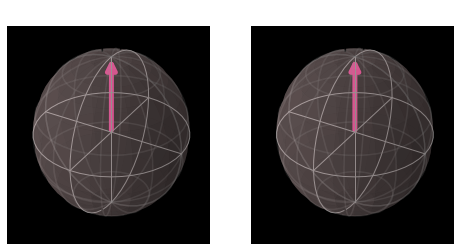

In [22]:
circuit = q.QuantumCircuit(2, 2)
statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)

AttributeError: 'function' object has no attribute 'keys'

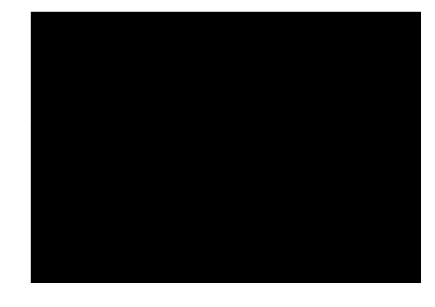

In [17]:
plot_histogram([counts], legend=["output"])